_______________________________________________________________________________________________________________________

## The shock of COVID-19 on Oil & Gas Price, Labor Market
_______________________________________________________________________________________________________________________
**Project Report** (Final project group 31)

**Principal Investigators:** Sachin Badole (sbadole@wisc.edu)

**Advisor:** Professor Kim J. Ruhl

Department of Economics, University of Wisconsin Madison   

December 11, 2020
_______________________________________________________________________________________________________________________


In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

%matplotlib inline  

# 1.1	Crude Oil Price

In [2]:

# Import three different datasets
europe_data = pd.read_excel("DCOILBRENTEU.xls", na_values = '.', skiprows = 10)
oklahoma_data = pd.read_excel("DCOILWTICO.xls", na_values = '.', skiprows = 10)
dubai_data = pd.read_excel("POILDUBUSDM.xls", na_values = '.', skiprows = 10)

# Merged all datasets
merged_1 = pd.merge(europe_data, oklahoma_data, on = ["observation_date"])
merged_total = pd.merge(merged_1, dubai_data, on = ["observation_date"])

# Rename columns
merged_total.rename(columns = {'observation_date':'date', 
                               'DCOILBRENTEU':'europe_price', 
                               'DCOILWTICO':'oklahoma_price', 
                               'POILDUBUSDM':'dubai_price'}, inplace = True)

# Set index 
merged_total = merged_total.set_index('date')
merged_total.head(2)

,europe_price,oklahoma_price,dubai_price
date,,,
2000-01-01,25.511000,27.259474,23.18
2000-02-01,27.775714,29.366000,24.62


### Figure 1: Crude Oil Prices of three region: US, Europe, Dubai

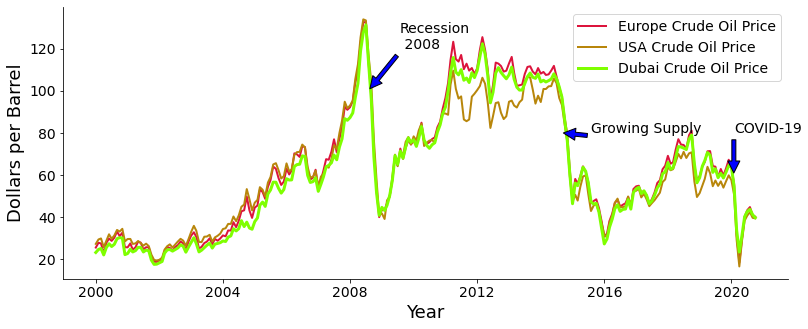

In [3]:

# Set axis size
fig, ax = plt.subplots(figsize = (13,5))

# Plot three line graph in one plot
ax.plot(merged_total.index, merged_total['europe_price'], color = '#DC143C', linewidth = 2)
ax.plot(merged_total.index, merged_total['oklahoma_price'], color = '#B8860B', linewidth = 2)
ax.plot(merged_total.index, merged_total['dubai_price'], color = 'chartreuse', linewidth = 3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the x and y axis
ax.set_ylabel('Dollars per Barrel',fontsize = 18)
ax.set_xlabel('Year',fontsize = 18)

# Set Legend for three line graph
plt.legend(['Europe Crude Oil Price',
            'USA Crude Oil Price', 
            'Dubai Crude Oil Price'], fontsize = 14) 

# Three Annotation 
anno = ['COVID-19', 'Recession\n 2008', 'Growing Supply']
date_p = ["2020-1-29", "2008-7-29", "2014-9-1"]
y_p = [60, 100, 80]
date_t = ["2020-1-29", "2009-7-29", "2015-7-29"]
y_t = [80, 120, 80]

for a, b, c, d, e in zip(anno, date_p, y_p, date_t, y_t):
    ax.annotate(a, xy = (pd.to_datetime(b), c), xytext = (pd.to_datetime(d), e),
             arrowprops = dict(facecolor = 'blue', shrink = 0.05), fontsize = 14)

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

# Save figure in svg formate and plot.
plt.savefig('crude_oil.svg', bbox_inches = "tight")
plt.show()

In [4]:

# Create three new variable for percent change of crude oil price in three nations.
merged_total['price_grwusa'] = merged_total['oklahoma_price'].pct_change()*100
merged_total['price_grweuro'] = merged_total['europe_price'].pct_change()*100
merged_total['price_grwdubai'] = merged_total['dubai_price'].pct_change()*100

# Look data
merged_total.head(2)

,europe_price,oklahoma_price,dubai_price,price_grwusa,price_grweuro,price_grwdubai
date,,,,,,
2000-01-01,25.511000,27.259474,23.18,NaN,NaN,NaN
2000-02-01,27.775714,29.366000,24.62,7.727685,8.877403,6.212252


### Figure 2: Crude Oil Price Change in \% During COVID-19

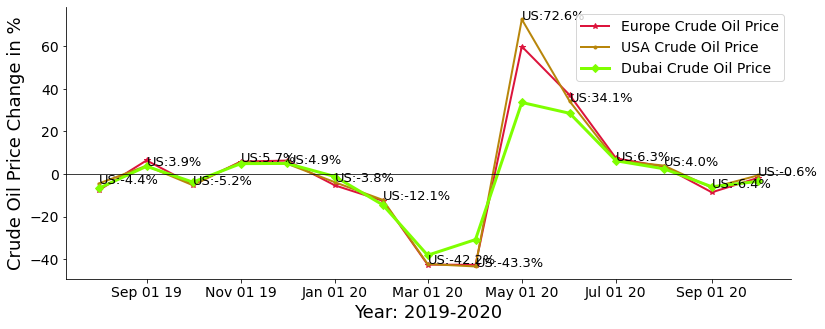

In [5]:

# Restricted the data from date 2019-08-01 to 2020-09-01 to observe the COVID effect on crude oil price.
merged_totalc = merged_total.loc['2019-08-01':]

# Plot three line graph in one plot
fig, ax = plt.subplots(figsize = (13,5))
ax.plot(merged_totalc.index, merged_totalc['price_grweuro'], color = '#DC143C', linewidth = 2, marker = "*")
ax.plot(merged_totalc.index, merged_totalc['price_grwusa'], color = '#B8860B', linewidth = 2, marker = ".")
ax.plot(merged_totalc.index, merged_totalc['price_grwdubai'], color = 'chartreuse', linewidth = 3, marker = "D")

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the x and y axis
ax.set_ylabel('Crude Oil Price Change in %',fontsize = 18)
ax.set_xlabel('Year: 2019-2020',fontsize = 18)

# Add a horizontal line at y=0
ax.axhline(y = 0, color = 'black', linewidth = 0.75)

# Set Legend for three line graph
plt.legend(['Europe Crude Oil Price',
            'USA Crude Oil Price', 
            'Dubai Crude Oil Price'], fontsize = 14) 

# These each points shows the crude oil price change in % in the U.S.
for a,b in zip(merged_totalc.index, merged_totalc['price_grwusa']): 
        plt.text(a, b, "US:{0:.1f}%".format(b) , fontsize = 13)

# Change the x axis tick date formate
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %y"))

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

# Save figure in svg formate and plot.
plt.savefig('crude_oil_covid.svg', bbox_inches = "tight")
plt.show()


# 1.2	Unemployment Rate

In [6]:
# Load the USA all over unemployment rate data.
unemp_all_rate = pd.read_csv('UNRATE.csv')

# Change date formate
unemp_all_rate['DATE'] = pd.to_datetime(unemp_all_rate['DATE'])

# Change columns name
unemp_all_rate = unemp_all_rate.rename(columns = {'DATE':'date', 'UNRATE':'unemp_all_rate'}) 

# Look data
print(unemp_all_rate.head(2),'\n')

# Look at Shape of data
print('Number of rows and columns-',unemp_all_rate.shape,'\n')

# Verified data type
print(unemp_all_rate.dtypes) 


        date  unemp_all_rate
0 2005-01-01             5.3
1 2005-02-01             5.4 

Number of rows and columns- (190, 2) 

date              datetime64[ns]
unemp_all_rate           float64
dtype: object


In [7]:
# Load the USA Oil and Gas unemployment rate data.
unemp_oil_rate = pd.read_excel("LNU04032230.xls", na_values = '.', skiprows = 10)

# change columns name
unemp_oil_rate = unemp_oil_rate.rename(columns = {'observation_date':'date', 'LNU04032230':'unemp_oil_rate'})  

# Look Data
print(unemp_oil_rate.head(2),'\n')

# Look at shaep of data
print('Number of rows and columns-',unemp_oil_rate.shape,'\n')

# Verified data type
print(unemp_oil_rate.dtypes,'\n')

# Merge two datasets
unemployment = pd.merge(left = unemp_oil_rate, right = unemp_all_rate, on = 'date', how = 'inner')

# Print final merge dataset
print(unemployment.head(2))

        date  unemp_oil_rate
0 2005-01-01             4.9
1 2005-02-01             4.0 

Number of rows and columns- (190, 2) 

date              datetime64[ns]
unemp_oil_rate           float64
dtype: object 

        date  unemp_oil_rate  unemp_all_rate
0 2005-01-01             4.9             5.3
1 2005-02-01             4.0             5.4


### Figure 3: Unemployment Rate in USA at Oil and All other sector

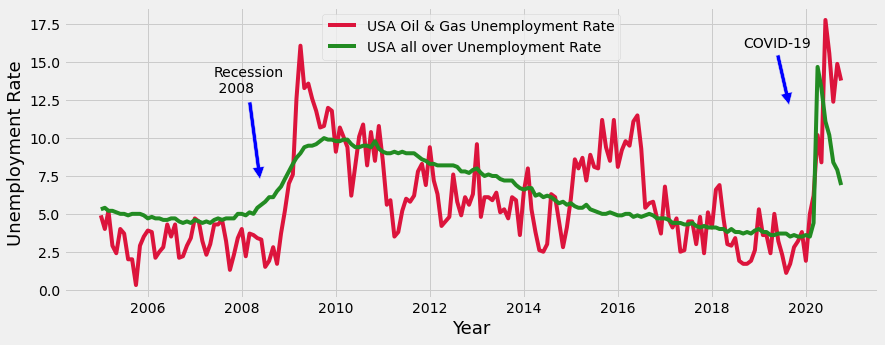

In [8]:
# Set the theme
plt.style.use('fivethirtyeight')

# Set axis and plot two line graph in one plot
fig, ax = plt.subplots(figsize = (13,5))
ax.plot(unemployment.date, unemployment['unemp_oil_rate'], color = '#DC143C')
ax.plot(unemployment.date, unemployment['unemp_all_rate'], color = 'forestgreen')

# Label x and y axis
ax.set_ylabel('Unemployment Rate',fontsize = 18)
ax.set_xlabel('Year',fontsize = 18)

# Two Annotation 
anno = ['COVID-19', 'Recession\n 2008']
date_p = ["2019-8-29", "2008-5-26"]
y_p = [12, 7]
date_t = ["2018-8-29", "2007-5-29"]
y_t = [16, 13]

for a, b, c, d, e in zip(anno, date_p, y_p, date_t, y_t):
    ax.annotate(a, xy = (pd.to_datetime(b), c), xytext = (pd.to_datetime(d), e),
             arrowprops = dict(facecolor='blue', shrink = 0.05), fontsize = 14)

# Set legend
plt.legend(['USA Oil & Gas Unemployment Rate', 'USA all over Unemployment Rate'], fontsize = 14)

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

# Save the plot in svg formate
plt.savefig('unemployment.svg', bbox_inches = "tight")
plt.show()

In [9]:
# Restrict the data for observe the Covid-19 effect 
unemployment = unemployment.set_index('date')
unemploymentc = unemployment.loc['2019-08-01':]
unemploymentc.head(2)

,unemp_oil_rate,unemp_all_rate
date,,
2019-08-01,1.1,3.7
2019-09-01,1.7,3.5


### Figure 4: Unemployment Rate in USA During COVID-19

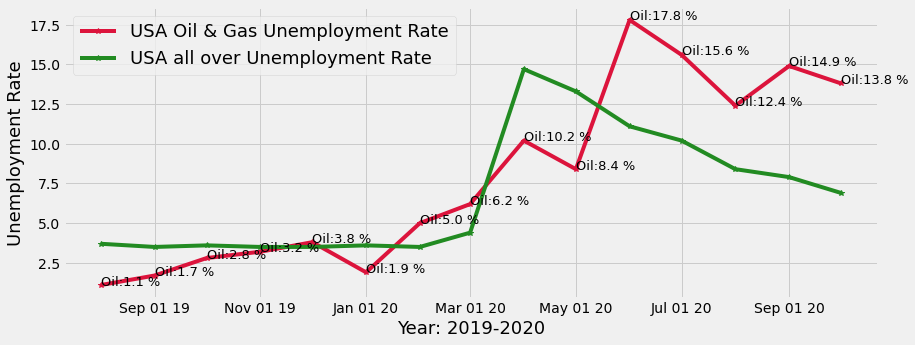

In [10]:
# Set theme
plt.style.use('fivethirtyeight')

# Plot the two line graph 
fig, ax = plt.subplots(figsize = (13,5))
ax.plot(unemploymentc.index, unemploymentc['unemp_oil_rate'], color = '#DC143C', marker = '*')
ax.plot(unemploymentc.index, unemploymentc['unemp_all_rate'], color = 'forestgreen', marker = '*')

# Label x and y axis
ax.set_ylabel('Unemployment Rate',fontsize = 18)
ax.set_xlabel('Year: 2019-2020',fontsize = 18)

# These each points shows the crude oil price change in % in the U.S.
for a,b in zip(unemploymentc.index, unemploymentc['unemp_oil_rate']): 
    plt.text(a, b, "Oil:{0:.1f} %".format(b) , fontsize = 13)

# Set the legend 
plt.legend(['USA Oil & Gas Unemployment Rate', 'USA all over Unemployment Rate'], fontsize = 18)

# Change the x axis tick date formate
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %y"))

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

# Save the plot in svg formate
plt.savefig('unemployment_covid.svg', bbox_inches = "tight")
plt.show()

# 1.3	Demand and Supply

 ### U. S. Consumption of Petroleum Products

In [11]:

# Load  U.S. Weekly Product consumption Data
supply_data = pd.read_excel('PET_CONS_WPSUP_K_W.xls', sheet_name = 'Data 1', skiprows = 2)

# Change date formate
supply_data['Date'] = pd.to_datetime(supply_data['Date'])

# set index
supply_data.set_index('Date', inplace = True)

# change columns name
supply_data = supply_data.rename(
    columns = {'Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)':'supply_pp',
       'Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)':'supply_fmg',
       'Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)':'supply_ktjf',
       'Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)':'supply_dfo',
       'Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)':'supply_rfo',
       'Weekly U.S. Product Supplied of Propane and Propylene  (Thousand Barrels per Day)':'supply_ppro',
       'Weekly U.S. Product Supplied of Other Oils  (Thousand Barrels per Day)':'supply_oo'})

# Change weekly data to monthly
supply_datam = supply_data.resample('m').mean()  

# Change weekly data to yearly
supply_datay = supply_data.resample('y').mean()  

# Restrick the data from year 2015
supply_data = supply_datam.loc['2015-01-01':]

# Look data
supply_data.head(3)

,supply_pp,supply_fmg,supply_ktjf,supply_dfo,supply_rfo,supply_ppro,supply_oo
Date,,,,,,,
2015-01-31,19598.00,8799.80,1506.40,3916.60,215.80,1522.0,3637.00
2015-02-28,19880.25,8659.00,1479.00,4221.25,135.25,1625.5,3760.00
2015-03-31,19085.00,8957.25,1533.75,3829.50,164.75,1102.5,3497.75


### Figure 5: Monthly U.S. Consumption of Petroleum Products (Thousand Barrels per Day)

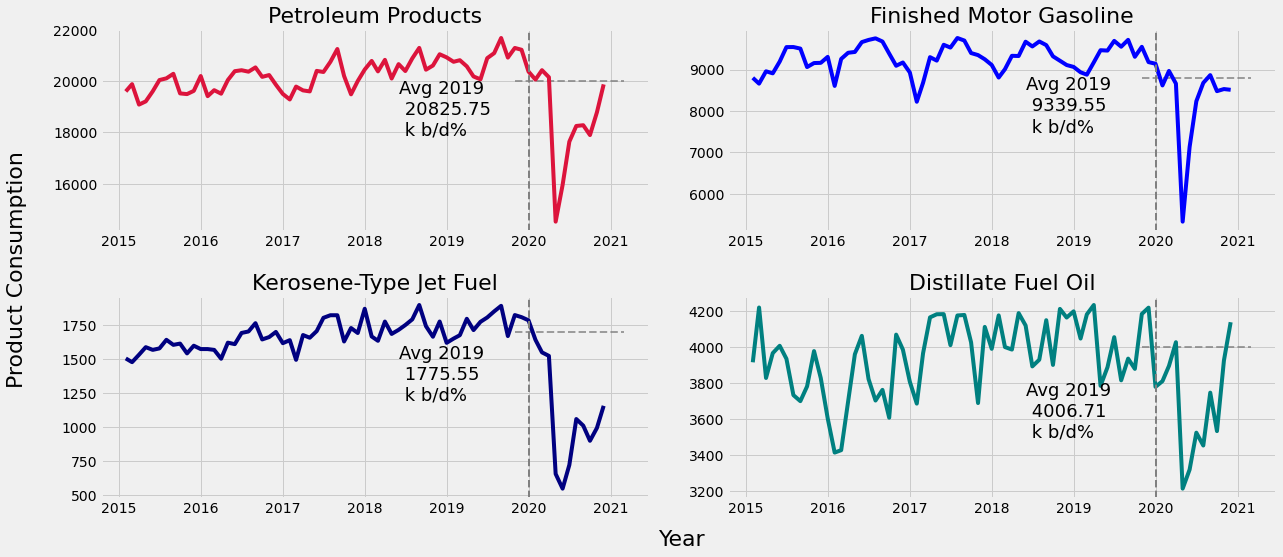

In [12]:
# set theme
plt.style.use('fivethirtyeight')

# Plot (2,2) line graph 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (18,8))
fig.tight_layout(pad = 3.0)      # space between plots
xposition = [ax1, ax2, ax3, ax4] # list of axis

# Total petroleum products Consumption
ax1.plot(supply_data.index, supply_data['supply_pp'], color = '#DC143C') 
ax2.plot(supply_data.index, supply_data['supply_fmg'], color = 'blue') 
ax3.plot(supply_data.index, supply_data['supply_ktjf'], color = 'navy') 
ax4.plot(supply_data.index, supply_data['supply_dfo'], color = 'teal') 

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

# set title to each plot
product = ['Petroleum Products', 'Finished Motor Gasoline', 'Kerosene-Type Jet Fuel', 'Distillate Fuel Oil']
for i, j in zip(xposition, product):
    i.set_title(j, fontsize = 22)

# Label x and y axis
fig.text(0.5, 0.02, 'Year', ha = 'center', fontsize = 22)
fig.text(-0.02, 0.5, 'Product Consumption', 
         va = 'center', rotation = 'vertical', fontsize = 22)

# Horizontal and vertical line
yposition = [20000, 8800, 1700, 4000]

for i, j in zip(xposition, yposition):
    i.axvline(x = pd.to_datetime('2020-01-01'), color = 'grey', linestyle = '--', linewidth = 2)
    i.hlines(y = j, xmin = pd.to_datetime('2019-11-01'), xmax = pd.to_datetime('2021-03-01'), 
           color = 'grey', linestyle = '--', linewidth = 2, alpha = 0.75)

# add text in each plot avg supply in 2019
axl = [ax1, ax2, ax3, ax4]
pointy = [17900, 7500, 1200, 3500]
avgp = [20825.75, 9339.55, 1775.55, 4006.71]

for a, b, c in zip(axl, pointy, avgp):
    a.text(pd.to_datetime('2018-6-1'), b, "Avg 2019 \n {0:.2f} \n k b/d%".format(c), fontsize = 18)
     
# Save figure       
plt.savefig('us_product_supplied.svg', bbox_inches = "tight")
plt.show()

In [13]:
# Average Consumption of petroleum products in the year 1920

supply_2019 = supply_datay.loc['2019-12-31']
supply_2019

supply_pp      20825.750000
supply_fmg      9339.557692
supply_ktjf     1775.557692
supply_dfo      4006.711538
supply_rfo       305.596154
supply_ppro     1147.807692
supply_oo       4250.500000
Name: 2019-12-31 00:00:00, dtype: float64

In [14]:
# Average Consumption of petroleum products in the year 2020

supply_2020 = supply_datay.loc['2020-12-31']
supply_2020

supply_pp      18275.826087
supply_fmg      8172.065217
supply_ktjf     1066.108696
supply_dfo      3665.695652
supply_rfo       240.239130
supply_ppro     1146.065217
supply_oo       3985.869565
Name: 2020-12-31 00:00:00, dtype: float64

### Figure 6: U.S. monthly Crude Oil import and export (Thousand Barrels per Day)

In [15]:
# Load Import data

import_dus = pd.read_excel('PET_MOVE_WKLY_DC_NUS-Z00_MBBLPD_W.xls', sheet_name = 'Data 1', skiprows = 2)

# change columns name
import_dus = import_dus.rename(columns = {'Weekly U.S. Imports of Crude Oil  (Thousand Barrels per Day)':'usimport'})

import_dus = import_dus[['Date', 'usimport']]  # keep two columns
import_dus.set_index('Date', inplace = True)   # set index
import_dus = import_dus.loc['2015-01-01':]     # restrict data from 2015
import_dus = import_dus.resample('m').mean()   # monthly avg

# Load Export data
export_dus = pd.read_excel('PET_MOVE_WKLY_DC_NUS-Z00_MBBLPD_W.xls', sheet_name = 'Data 2', skiprows = 2)

# change columns name
export_dus = export_dus.rename(columns = 
                               {'Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day)':'usexport'})

export_dus = export_dus[['Date', 'usexport']] 
export_dus.set_index('Date', inplace = True)
export_dus = export_dus.loc['2015-01-01':]
export_dus = export_dus.resample('m').mean()  


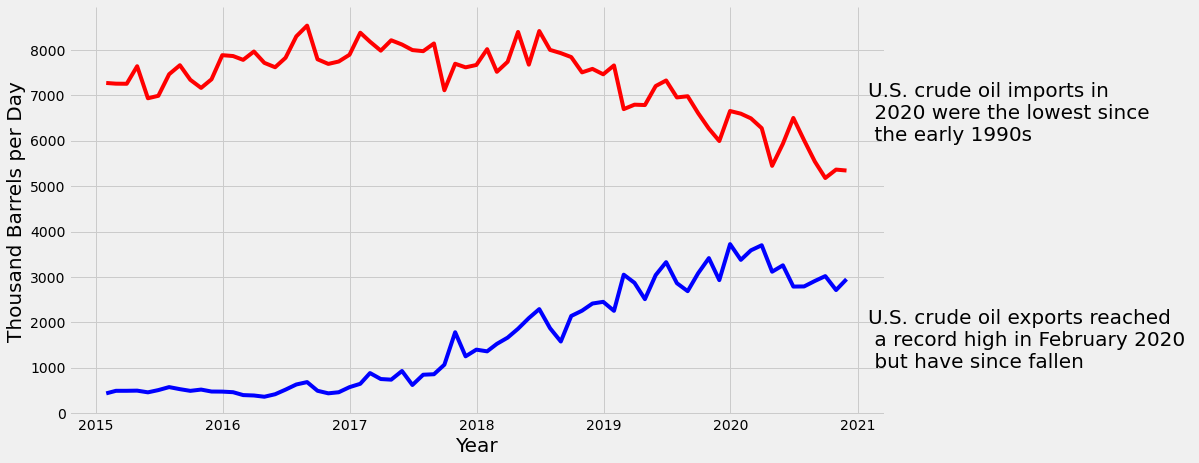

In [16]:
#plt.style.use('fivethirtyeight')

# plot two line graph
fig, ax = plt.subplots(figsize = (13,7))
ax.plot(import_dus.index, import_dus['usimport'], color = 'r', linewidth = 4)
ax.plot(export_dus.index, export_dus['usexport'], color = 'b', linewidth = 4)

# remove two axis top and right one.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label x and y axis
ax.set_ylabel('Thousand Barrels per Day',fontsize = 20)
ax.set_xlabel('Year',fontsize = 20)

# Annotation
ax.annotate('U.S. crude oil imports in \n 2020 were the lowest since \n the early 1990s', 
            xy = (pd.to_datetime("2020-4-01"), 6000), xytext = (pd.to_datetime("2021-2-1"), 6000), fontsize = 20)

ax.annotate('U.S. crude oil exports reached \n a record high in February 2020 \n but have since fallen', 
            xy = (pd.to_datetime("2020-4-1"), 3100), xytext = (pd.to_datetime("2021-2-1"), 1000), fontsize = 20)

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

# Save plot
plt.savefig('impexp_oil.svg', bbox_inches = "tight")
plt.show()

### Regression Plot y = crude oil price, x = Supplied of Finished Motor Gasoline

In [17]:
# Crude Oil price data for U.S.

oklahoma_data = oklahoma_data.rename(columns = {'observation_date':'date', 'DCOILWTICO':'price'})
oklahoma_data.head(3)

,date,price
0,1991-01-01,25.234091
1,1991-02-01,20.477500
2,1991-03-01,19.901500


In [18]:
# Date formate because fail to merge properly

supply_datam = supply_datam.loc['1991-01-31':]
supply_datam = supply_datam.reset_index()
supply_datam['day'] = supply_datam['Date'].dt.day
supply_datam['month'] = supply_datam['Date'].dt.month
supply_datam['year'] = supply_datam['Date'].dt.year
supply_datam['days'] = 1
supply_datam['date'] = pd.to_datetime(supply_datam[['year', 'month', 'days']])
supply_datam.drop(['year', 'month', 'day', 'days', 'Date'], axis = 1, inplace = True)
supply_datam.head(3)

,supply_pp,supply_fmg,supply_ktjf,supply_dfo,supply_rfo,supply_ppro,supply_oo,date
0,16521.00,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-01
1,15977.25,6545.333333,1341.333333,3035.666667,1098.666667,NaN,NaN,1991-02-01
2,16956.40,7030.200000,1350.200000,3194.600000,1180.600000,NaN,NaN,1991-03-01


In [19]:
# Merge two data crude oil price ande supply of petroleum products

crude_ps = pd.merge(left = oklahoma_data, right = supply_datam, left_on = ['date'], 
                    right_on = ['date'], how = 'outer')
crude_ps.head(3)
crude_ps.shape

(359, 9)

### Figure 7: Crude Oil Price and Finished Motor Gasoline

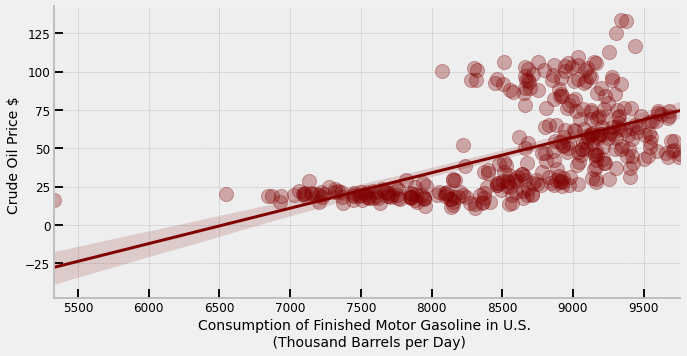

In [20]:

# Set tick size 
sns.set_context('talk')
# Set theme
plt.style.use('bmh')

# Reg Plot
my_fig, my_ax = plt.subplots(figsize = (10,5)) 
sns.regplot(x = 'supply_fmg',                                        
            y = 'price',                                      
            data = crude_ps,   
            ax = my_ax,                                         
            color = 'maroon',                               
            ci = 99, 
            scatter_kws={"color":"maroon","alpha":0.3,"s":200})     


sns.despine(ax = my_ax)                             

# Label x and y axis
my_ax.set_ylabel('Crude Oil Price $ ', fontsize = 14)
my_ax.set_xlabel('Consumption of Finished Motor Gasoline in U.S. \n (Thousand Barrels per Day)', fontsize = 14)

# Change x and y ticks.
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)

# Save plot
plt.savefig('us_crude_ps_reg.svg', bbox_inches = "tight")
plt.show()

# ARIMA MODEL - Crude oil Price in the U.S. in the final Forecasting model

In [21]:
# Import required packages
import numpy as np
import pandas as pd
import datetime
import csv

%matplotlib inline

### To run the following the ARIMA code, I have install some packages. Please consider this code.

pip install statsmodels   [Installing statmodels](https://www.statsmodels.org/dev/install.html)

pip install pmdarima [Installing pmdarima](https://pypi.org/project/pmdarima/)

pip install -U scikit-learn [Installing scikit-learn](https://scikit-learn.org/stable/install.html)

In [22]:
# Import required packages for ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [23]:
# Date from figure 2
merged_total.head(2)

,europe_price,oklahoma_price,dubai_price,price_grwusa,price_grweuro,price_grwdubai
date,,,,,,
2000-01-01,25.511000,27.259474,23.18,NaN,NaN,NaN
2000-02-01,27.775714,29.366000,24.62,7.727685,8.877403,6.212252


In [24]:
# Stationary

print("p-value:", adfuller(merged_total['oklahoma_price'].dropna())[1])

p-value: 0.08471316326250244


In [25]:
print("p-value:", adfuller(merged_total['oklahoma_price'].dropna())[1])

p-value: 0.08471316326250244


In [26]:
merged_total['all_1st_order'] = merged_total['oklahoma_price'] - merged_total['oklahoma_price'].shift(1)
print("p-value:", adfuller(merged_total['all_1st_order'].dropna())[1])

p-value: 8.517157824320418e-19


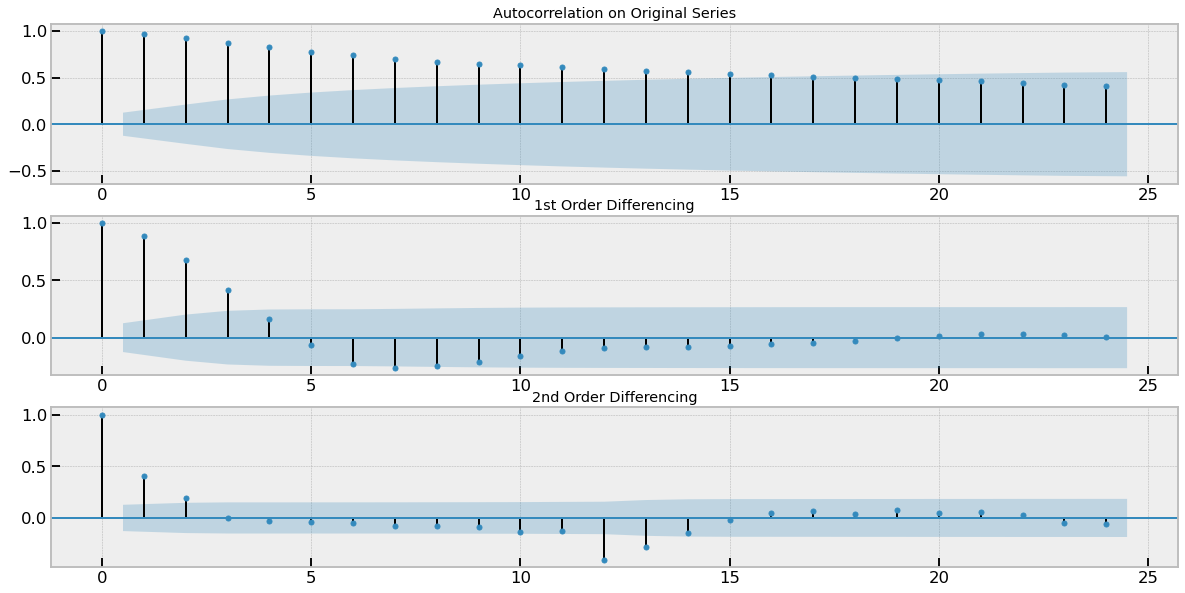

In [27]:
# Plot to check Stationary
fig = plt.figure(figsize = (18, 10))

# Plot Autocorrelati on Original Series
ax1 = fig.add_subplot(311)
fig = plot_acf(merged_total['oklahoma_price'], ax = ax1, title = 'Autocorrelation on Original Series')

# Plot 1st Order Differencing
ax2 = fig.add_subplot(312)
fig = plot_acf(merged_total['oklahoma_price'].diff(6).dropna(), ax = ax2, title = '1st Order Differencing')

# Plot 2nd Order Differencing
ax3 = fig.add_subplot(313)
fig = plot_acf(merged_total['oklahoma_price'].diff().diff(12).dropna(), ax = ax3, title = '2nd Order Differencing')




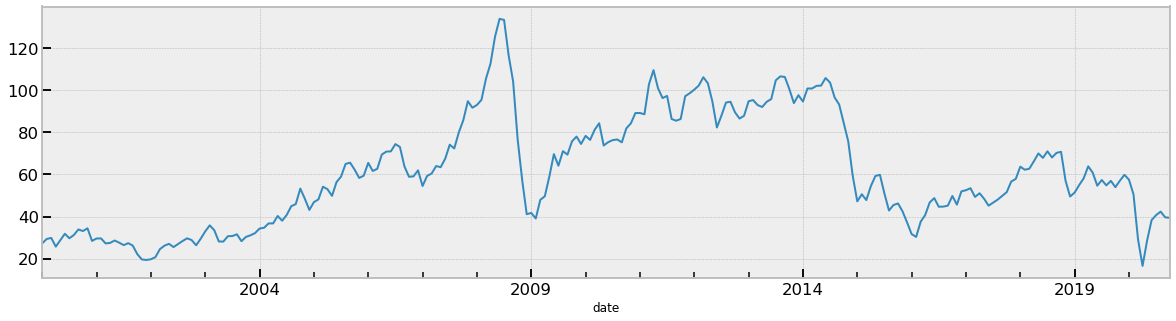

In [28]:
# Create 2nd order variable
merged_total['all_2nd_order'] = merged_total['oklahoma_price'].diff().diff(12)
# plot crude oil price graph
merged_total['oklahoma_price'].plot(figsize = (18, 5))

In [29]:
# Nonseasonal ARIMA Model

model_111 = ARIMA(merged_total['oklahoma_price'], order = (1,1,1))
model_111_fit = model_111.fit(disp = 0)
print(model_111_fit.summary())

/Users/sachin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/sachin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:       D.oklahoma_price   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -765.051
Method:                       css-mle   S.D. of innovations              5.224
Date:                Fri, 11 Dec 2020   AIC                           1538.102
Time:                        08:52:43   BIC                           1552.172
Sample:                    02-01-2000   HQIC                          1543.766
                         - 10-01-2020                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0530      0.528      0.101      0.920      -0.981       1.087
ar.L1.D.oklahoma_price     0.3670      0.130      2.831      0.005       0.113       0.621
ma.L

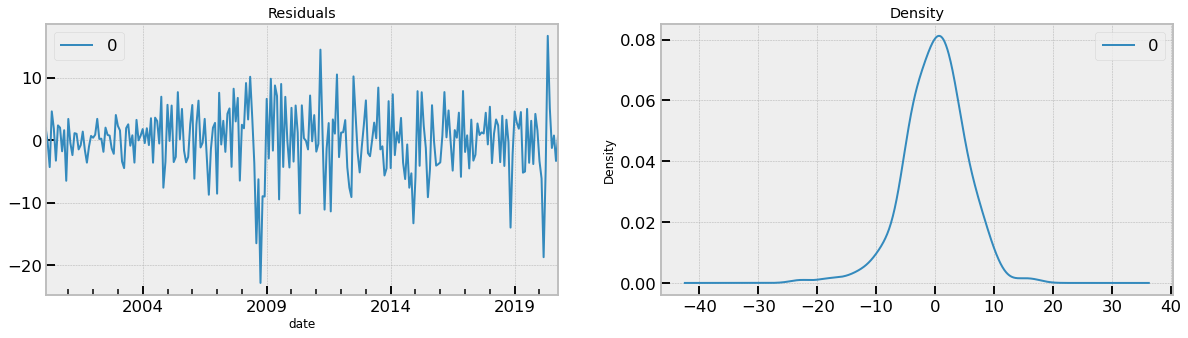

In [30]:
# Plot residual errors
residuals_111 = pd.DataFrame(model_111_fit.resid)

fig, ax = plt.subplots(1,2)
residuals_111.plot(title = "Residuals", ax = ax[0], figsize = (18, 5))
residuals_111.plot(kind ='kde', title = 'Density', ax = ax[1])
plt.show()

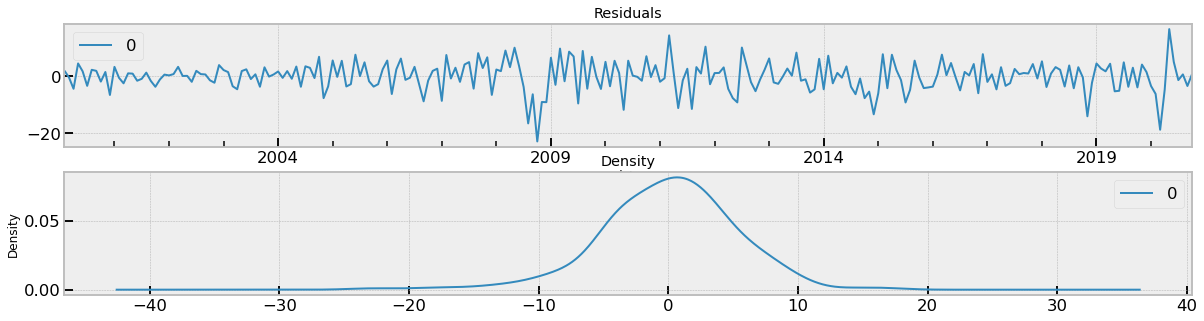

In [31]:
# Plot residual errors
residuals_111 = pd.DataFrame(model_111_fit.resid)

fig, ax = plt.subplots(2,1)
residuals_111.plot(title = "Residuals", ax = ax[0], figsize = (18, 5))
residuals_111.plot(kind ='kde', title = 'Density', ax = ax[1])
plt.show()

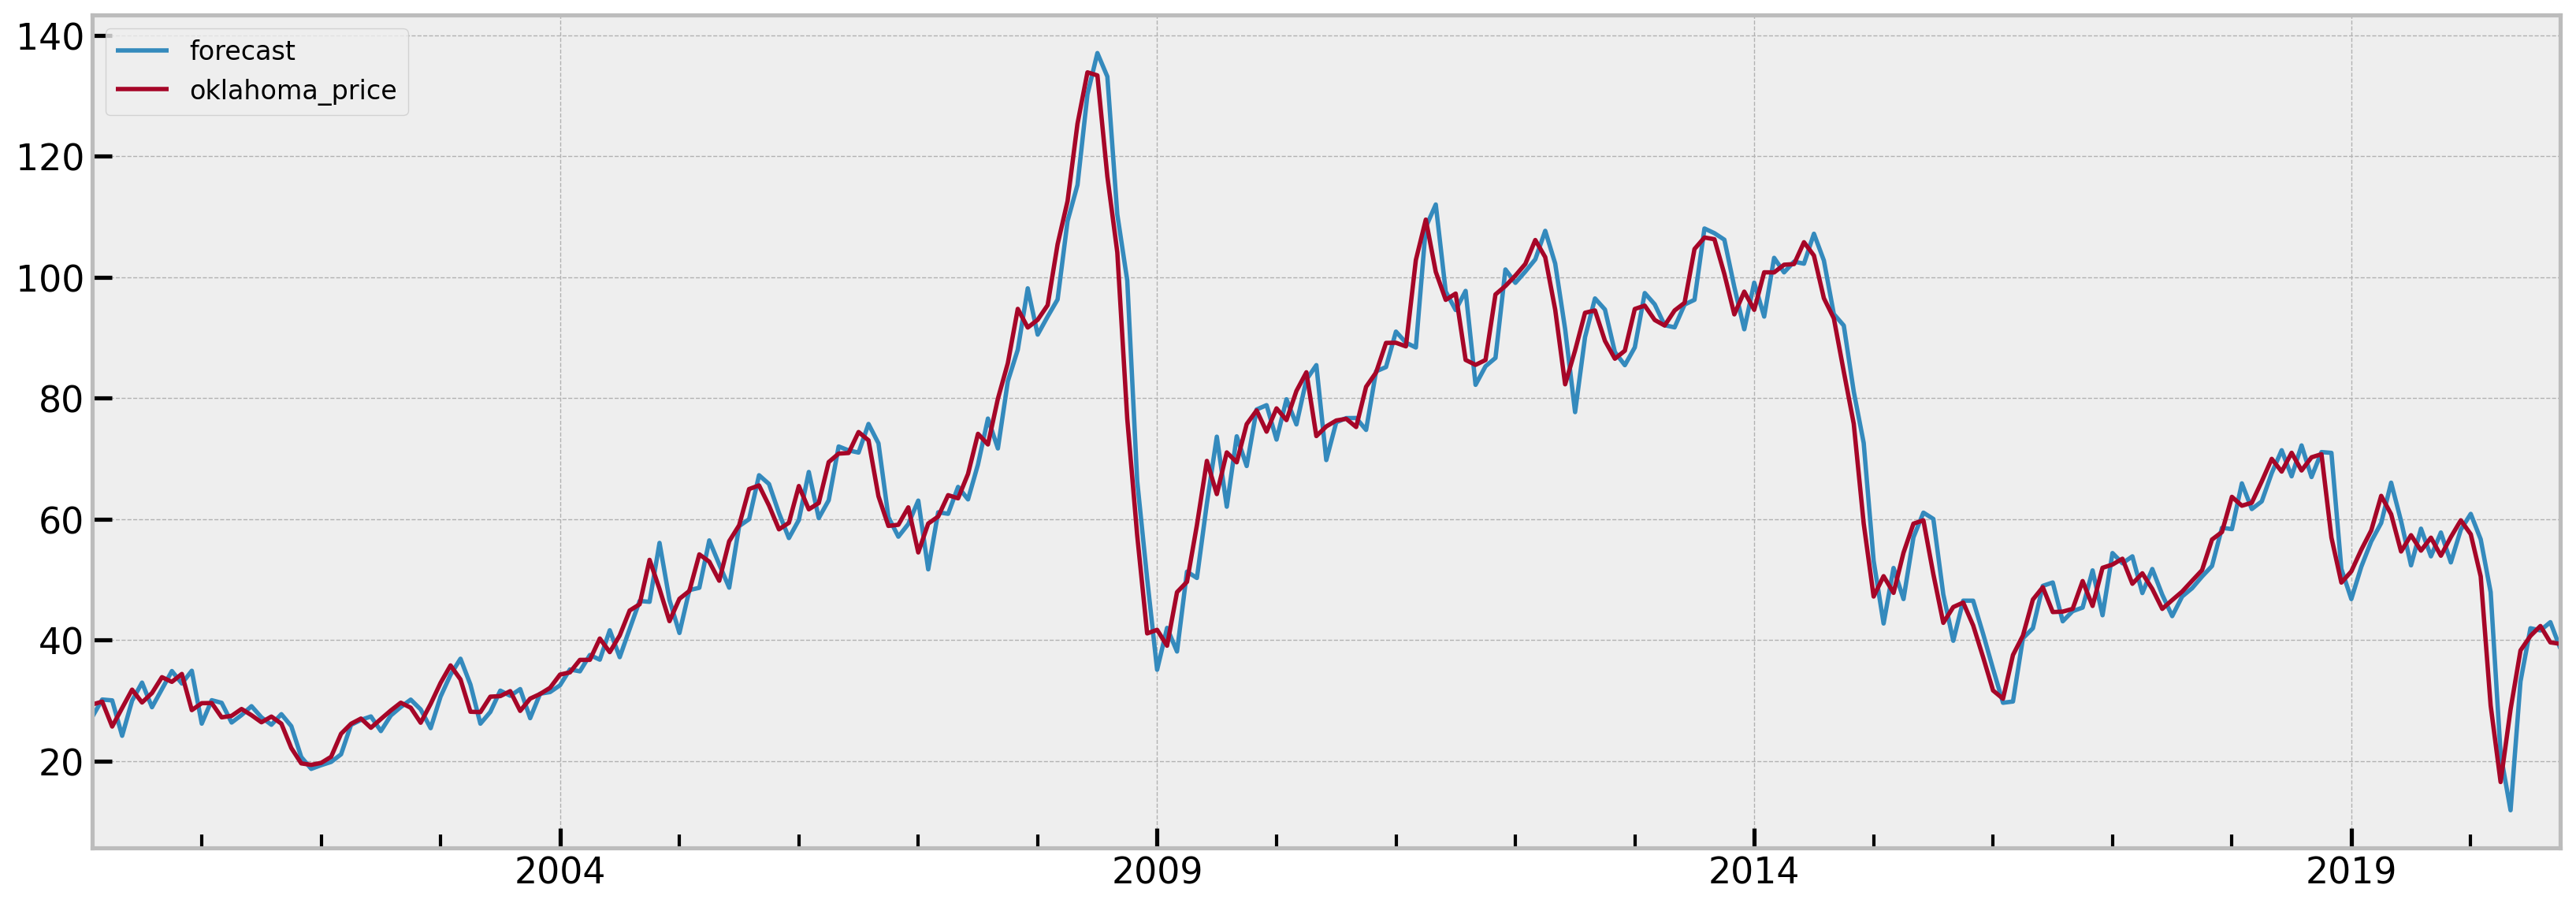

In [32]:
# Actual vs Fitted

plt.rcParams.update({'figure.figsize':(18,7), 'figure.dpi':200})
model_111_fit.plot_predict(dynamic = False)

plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [33]:
# Create Training and Testing sets
size = int(len(merged_total['oklahoma_price']) * 0.80)

train = merged_total['oklahoma_price'][0:size]
test = merged_total['oklahoma_price'][size:len(merged_total['oklahoma_price'])]

In [34]:
# Building 321 Model
model_321 = ARIMA(train, order = (3, 2, 1))
fitted = model_321.fit(disp = -1)
print(fitted.summary())

/Users/sachin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/sachin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:      D2.oklahoma_price   No. Observations:                  198
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -607.915
Method:                       css-mle   S.D. of innovations              5.154
Date:                Fri, 11 Dec 2020   AIC                           1227.829
Time:                        08:52:47   BIC                           1247.559
Sample:                    03-01-2000   HQIC                          1235.815
                         - 08-01-2016                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0084      0.010     -0.822      0.411      -0.028       0.012
ar.L1.D2.oklahoma_price     0.3816      0.071      5.401      0.000       0.243       0.520


In [35]:
# Forecast
fc, se, conf = fitted.forecast(50, alpha = 0.05) #95% conf

# Make as pandas series
fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[1,0], index = test.index)
upper_series = pd.Series(conf[1,0], index = test.index)

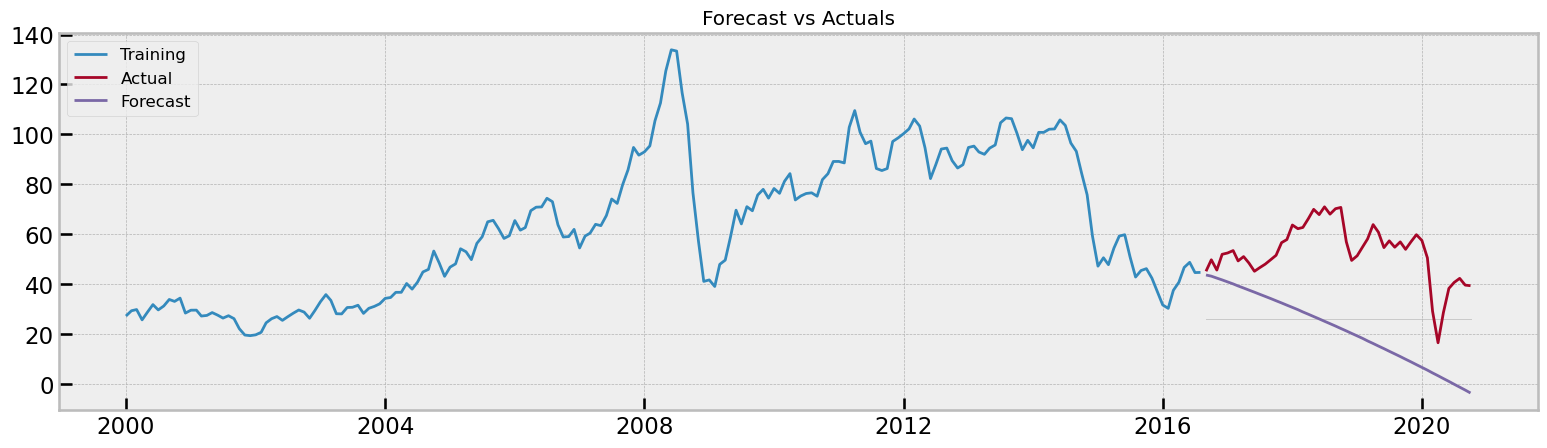

In [36]:
# Plot

plt.figure(figsize = (17,5), dpi = 100)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Actual')
plt.plot(fc_series, label = 'Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = 0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

/Users/sachin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


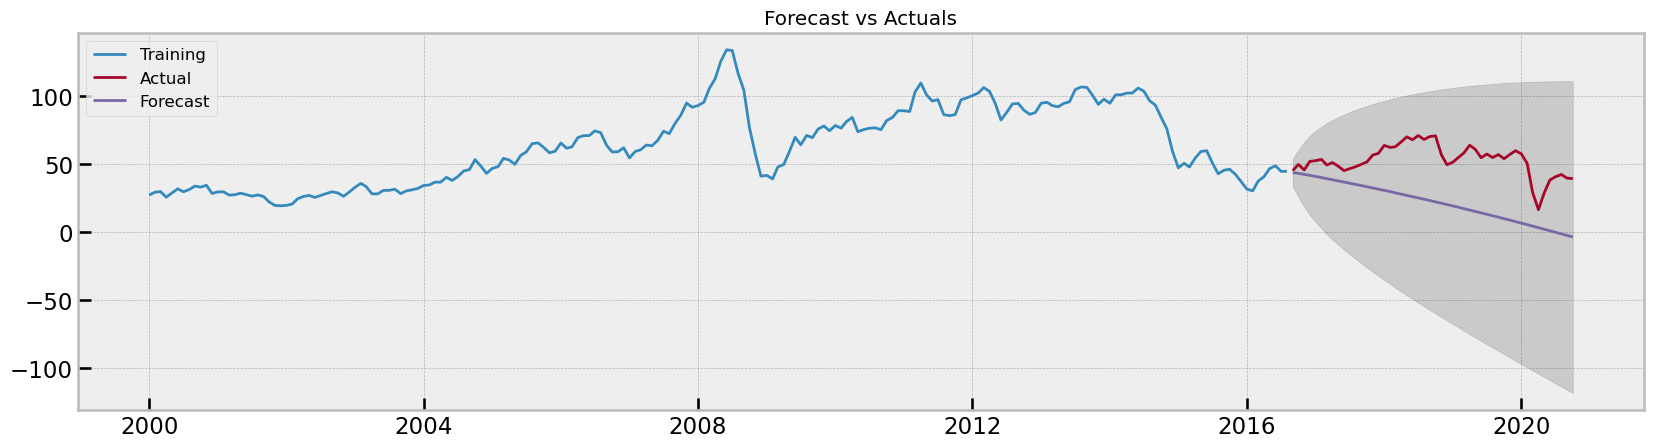

In [37]:
#  ARIMA (2,0,0) (0,1,1)[12]
model_201 = ARIMA(train, order = (2, 0, 0))
fitted = model_321.fit(disp = -1)
#print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(50, alpha = 0.05) #95% conf

# Make as pandas series
fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:,0], index = test.index)
upper_series = pd.Series(conf[:,1], index = test.index)

# Plot

plt.figure(figsize = (18,5), dpi = 100)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Actual')
plt.plot(fc_series, label = 'Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = 0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [38]:
model_auto = pm.auto_arima(merged_total['oklahoma_price'], start_p = 1, start_q = 1,
                          test = 'adf',              # use adftest to find optional 'd'
                          max_p = 3, max_q = 3,      # maximum p and q
                          m = 1,                     # frequency of series
                          d = None,                  # let model determine 'd'
                          seasonal_p = 0,            # No Seasonality
                          #start_p = 0,
                          D = 0,
                          trace = True,
                          error_action = 'ignore',
                          suppress_warnings = True,
                          stepwise = True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1538.102, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1572.315, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1536.109, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1541.922, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1570.333, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1538.098, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1539.796, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1534.119, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1536.108, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1536.112, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1539.935, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1537.806, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.221 seconds
                               SARIMAX Results                                
Dep. Vari

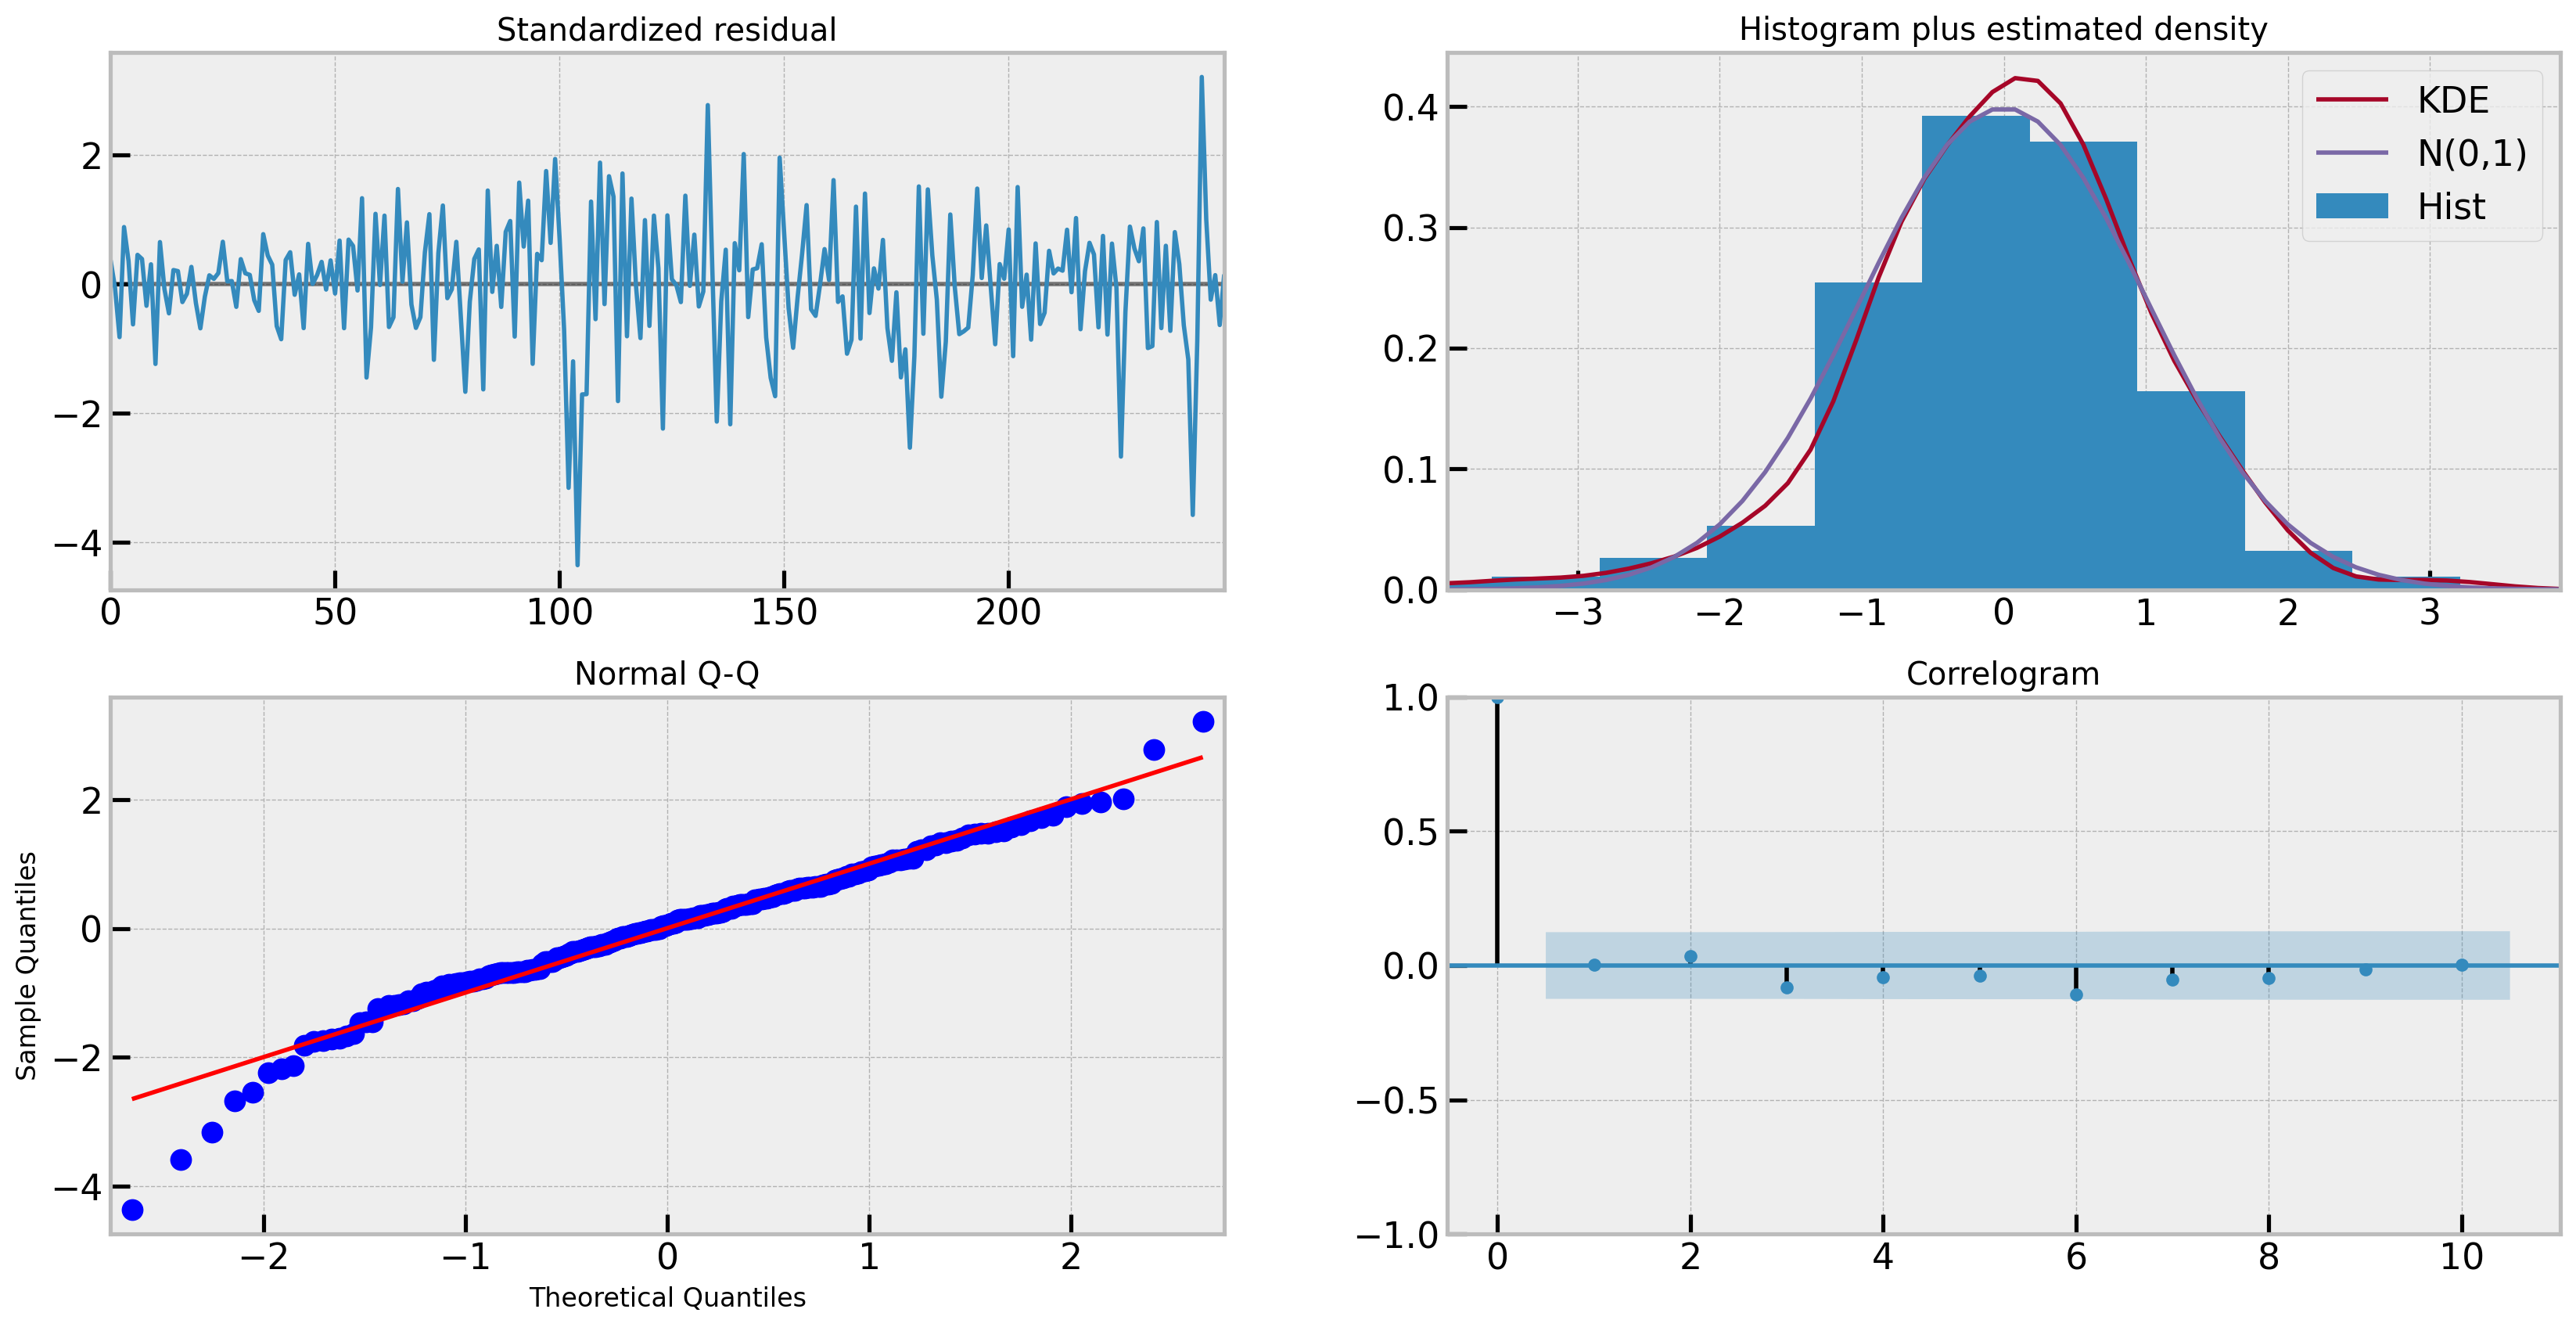

In [39]:
model_auto.plot_diagnostics(figsize = (18,10))
plt.show()

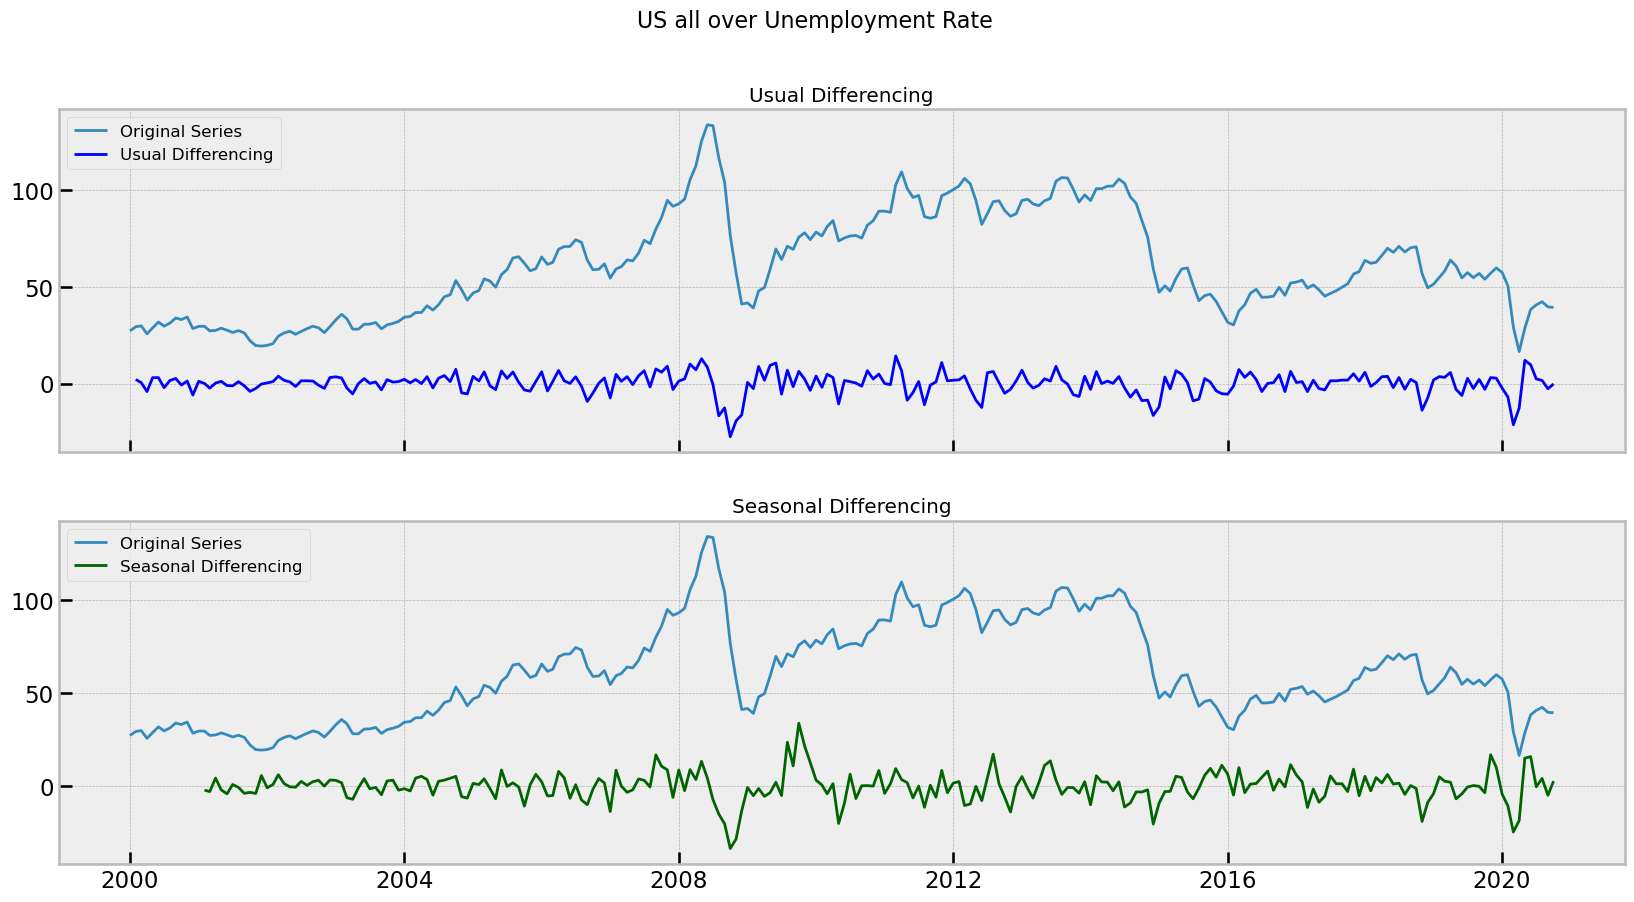

In [40]:
# Plot 
fig, axes = plt.subplots(2, 1, figsize = (18,10), dpi = 100, sharex = True)

# Usual Differencing
axes[0].plot(merged_total['oklahoma_price'][:], label = 'Original Series')
axes[0].plot(merged_total['oklahoma_price'][:].diff(1), label = 'Usual Differencing', color = 'blue')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc = 'upper left', fontsize = 12)

# Seasinal Differencing
axes[1].plot(merged_total['oklahoma_price'][:], label = 'Original Series')
axes[1].plot(merged_total['oklahoma_price'][:].diff().diff(12).dropna(), 
             label = 'Seasonal Differencing', color = 'darkgreen')
axes[1].set_title('Seasonal Differencing')

plt.legend(loc = 'upper left', fontsize = 12)
plt.suptitle('US all over Unemployment Rate', fontsize = 16)
plt.show()




In [41]:
# Seasonal - fit stepwise auto-ARIMA

smodel = pm.auto_arima(merged_total['oklahoma_price'], start_p = 1, start_q = 1,
                      test = 'adf',
                      max_p = 3, max_q = 3, m = 12,
                      #start_p = 0,
                      seasonal = True,
                      d = None, D = 1, trace = True,
                      error_action = 'ignore',
                      suppress_warnings = True,
                      stepwise = True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2161.441, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1614.588, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1889.177, Time=1.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2159.595, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1659.834, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1595.027, Time=2.28 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.68 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2143.609, Time=1.06 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1552.065, Time=2.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1576.264, Time=0.64 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.98 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -770.069
Date:                            Fri, 11 Dec 2020   AIC                           1550.138
Time:                                    08:53:57   BIC                           1567.500
Sample:                                         0   HQIC                          1557.135
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3535      0.048     27.922      0.000       1.259       1.449
ar.L2         -0.4205      0.049     -8.574      0.000      -0.517      -0.324
ar.S.L12      -0.5198      0.060     -8.725      0.000      -0.637      -0.403
ar.S.L24      -0.3373      0.066     -5.087      0.000      -0.467      -0.207
sigma2        36.6755      2.985     12.286      0.000      30.825      42.526
===================================================================================
Ljung-Box (Q):                       48.52   Jarque-Bera (JB):                 7.91
Prob(Q):                              0.17   Prob(JB):                         0.02
Heteroskedasticity (H):               2.39   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Figure 8: ARIMA MODEL - Forecasting of Crude oil Price in the U.S.

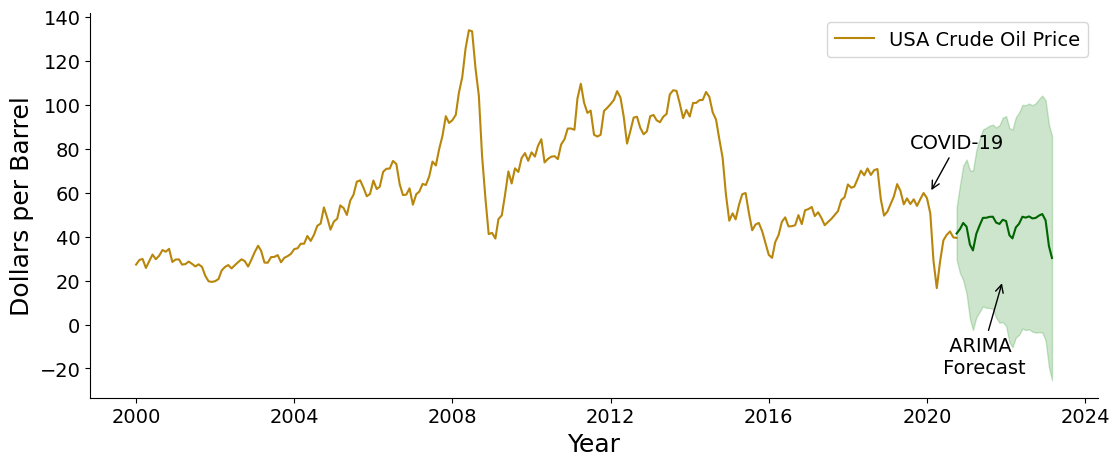

In [42]:
n_periods = 30
fitted, confint = smodel.predict(n_periods = n_periods, return_conf_int = True)
index_of_fc = pd.date_range(merged_total['oklahoma_price'].index[249], periods = n_periods, freq = 'MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index = index_of_fc)
lower_series = pd.Series(confint[:,0], index = index_of_fc)
upper_series = pd.Series(confint[:,1], index = index_of_fc)

# plot
plt.style.use('default')
fig, ax = plt.subplots(figsize = (13,5))
plt.plot(merged_total['oklahoma_price'], color = '#B8860B')
plt.plot(fitted_series, color = 'darkgreen')
plt.fill_between(lower_series.index,
                lower_series,
                upper_series,
                color = 'g', alpha = 0.20)

# Remove top and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lable x and y axis
ax.set_ylabel('Dollars per Barrel',fontsize = 18)
ax.set_xlabel('Year',fontsize = 18)

# Add legend
plt.legend(['USA Crude Oil Price'], fontsize = 14) 

# Annotation
ax.annotate('COVID-19', xy = (pd.to_datetime("2020-1-29"), 60), xytext = (pd.to_datetime("2019-7-29"), 80),
            arrowprops = dict(arrowstyle = "->"), fontsize = 14)

ax.annotate('  ARIMA \n Forecast', xy = (pd.to_datetime("2021-12-1"), 20), xytext = (pd.to_datetime("2020-4-1"), -22),
            arrowprops = dict(arrowstyle = "->"), fontsize = 14)

# Change x and y ticks.
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

plt.savefig('crude_oil_arima.svg', bbox_inches = "tight")
#plt.title("ARIMA MODEL - Forecasting of Crude oil Price in the U.S.")
plt.show()

### The End 
### Thank You